# Programación orientada a objetos (POO) en Python

La programación orientada a objetos (POO) es una forma de organizar el código. Así como un algoritmo suele estar asociado a una estructura de datos particular, la programación orientada a objetos "empaqueta" los datos junto con los métodos usados para tratarlos.

Python también permite la POO, que es un paradigma de programación en la que los datos y las operaciones que pueden realizarse con esos datos se agrupan en unidades lógicas llamadas objetos.

Cada uno de esos *objetos* consiste en:

* Datos (atributos de los objetos).
* Comportamiento (métodos de los objetos: son funciones que actúan sobre los atributos del objeto).

Por ejemplo, al manipular una lista:

In [33]:
nums = [1, 2, 3]    # Lista
nums.append(4)      # Esto es un método de la lista
nums.insert(1,10)   # Otro método de la lista
nums
[1, 10, 2, 3, 4]    # Estos son los datos modificados por los métodos

[1, 10, 2, 3, 4]

# Ejercicio de aplicación usando programación orientada a objetos

Estimar el vapor del agua cada **10 m** entre las alturas de 2 a 10000 m. Sabiendo que la temperatura y humedad relativa a 2 m es **23 °C** y **95 %** respectivamente. La temperatura y la humedad relativa decrecen con tasas de **-0.008 °C**  y **-0.01 %** cada metro, respectivamente. 

<img src='./img/Air-pressure-water.png' width='500' height='400'>

Use las siguientes ecuaciones: 

**El vapor de agua ($Ea$) a una altura z en m (hPa) esta dado por la siguiente ecuación:**

$Ea = (rH * Ew) / 100.0$

Donde:
* $rH$ es la humedad relativa (%).
* $Ew$ es la presión de vapor de saturación (hPa).

**Usar las siguientes ecuaciones para calcular $Ew$:**
```python
# Si temperatura es mayor o igual a 273.16 K
    Ew = 6.112 * np.exp((17.67*(T-273.16)) / ((T-29.66)))
# Si temperatura es menor a 273.16 K
    Ew = 6.112 * np.exp((22.46*(T-273.16)) / ((T-0.55)))

```
Donde:
* $T$ es la temperatura (°K).

In [34]:
import numpy as np

class perfil_temp:
    def __init__(self, T, RH, Zint, Ztop, intervalo):
        self.T = T
        self.RH = RH
        self.z1 = Zint
        self.z2 = Ztop
        self.intervalo = intervalo

    def temp_z(self):
                
        Z_z = np.arange(self.z1, self.z2, self.intervalo)
        T_z = (self.T + (Z_z - 2) * -0.008) + 273.16
        RH_z = self.RH + (Z_z - 2) * -0.01
        RH_z[RH_z < 0] = 0
        Ea_z = [] # hPa
        for i in range(len(T_z)):
            Ti  = T_z[i]
            RHi = RH_z[i]
            if Ti >= 273.16:
            # over water
                Ew = 6.112 * np.exp((17.67*(Ti-273.16)) / ((Ti-29.66)))
            else:
            # over ice
                Ew = 6.112 * np.exp((22.46*(Ti-273.16)) / ((Ti-0.55)))

            Ea  = (RHi * Ew) / 100.0
            Ea_z.append(Ea)

        return Ea_z, Z_z

In [35]:
Ea_z, Z_z = perfil_temp(24, 95, 2, 10000, 10).temp_z()

In [36]:
import matplotlib.pyplot as plt 

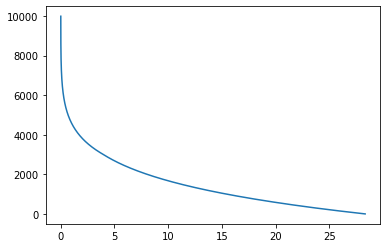

In [37]:
plt.plot(Ea_z, Z_z)

## Retornar al [índice](./../indice.md)